In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 1.
https://www.kaggle.com/yasserh/wine-quality-dataset . Clasificación de la calidad del vino según alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

In [2]:
wine = pd.read_csv('csv/WineQT.csv')
wine

FileNotFoundError: [Errno 2] No such file or directory: 'WineQT.csv'

**Enseñamos las 5 primeras y últimas filas del dataset**

In [ ]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


**Borramos la columna Id y separamos los datos de entrada y etiquetas (resultados)**

In [ ]:
wine = wine.drop('Id', axis=1)
x_wine = wine.drop('quality', axis=1)
y_wine = wine['quality']

**Mostramos los parámetros estadísticos del dataset**

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Creamos el mapa de calor del dataset**

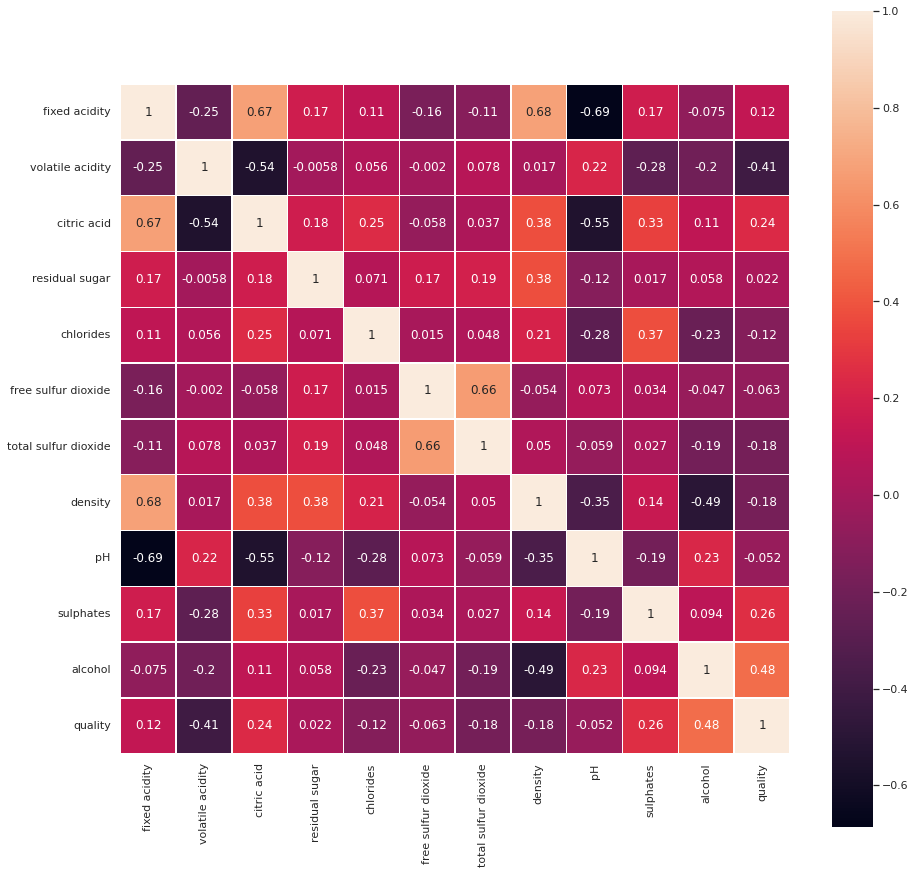

In [ ]:
sns.set(rc = {'figure.figsize': (15, 15)})
# plt.figure(figsize = (12, 12))
sns.heatmap(wine.corr(), square = True, annot=True, linewidth=.3)

**Separamos los datos entre entrenamiento y prueba, como se pide un 25% para el test, se usa el parámetro test_size**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, random_state=1, test_size=0.25)

**Elegimos, instanciamos y entrenamos el modelo**

In [ ]:
k = 15
w = 'uniform'

model = KNeighborsClassifier(k, weights=w)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

**La precisión de este modelo es de un 50.3%**

In [ ]:
accuracy_score(y_test, y_predict) * 100

50.349650349650354

**Obtenemos un array con las predicciones hechas por nuestro modelo**

In [ ]:
y_predict

array([6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       5, 6, 5, 6, 7, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6,
       5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 6, 6, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5, 5, 6, 6, 5, 7, 6, 5, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5])

Predicción

In [ ]:
prediccion = pd.DataFrame({'fixed acidity':[6], 'volatile acidity':[.6], 'citric acid':[.04], 'residual sugar': [2], 'chlorides': [.06], 'free sulfur dioxide':[17],
       'total sulfur dioxide':[37], 'density':[.9978], 'pH':[3.18], 'sulphates':[.7], 'alcohol':[8]})

In [ ]:
model.predict(prediccion)[0]

6

**Generamos una matriz de confusión a partir de la predicción de nuestro modelo**

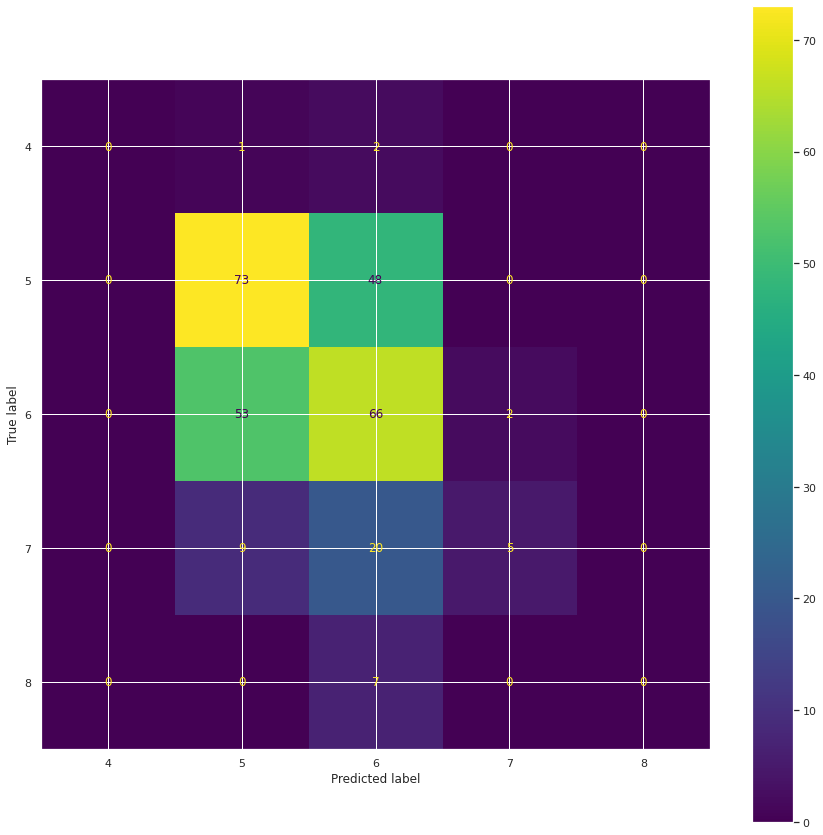

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

Error cuadrático medio

In [ ]:
mean_squared_error(y_test, y_predict)

0.6853146853146853

Error absoluto medio

In [ ]:
mean_absolute_error(y_test, y_predict)

0.5594405594405595

# 2. 
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction . Clasificación binaria. El objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos (edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si tienen enfermedad o no.

In [ ]:
heart = pd.read_csv('csv/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Enseñamos las 5 primeras y últimas filas del dataset**

In [ ]:
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


**Transformamos los valores en numérico y separamos los datos de entrada y etiquetas (resultados)**

In [ ]:
heart = heart.apply(lambda col: pd.factorize(col, sort=True)[0])

x_heart = heart.drop('HeartDisease', axis=1)
y_heart = heart['HeartDisease']

**Mostramos los parámetros estadísticos del dataset**

In [ ]:
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,25.510893,0.789760,0.781046,32.899782,81.640523,0.233115,0.989107,62.979303,0.404139,18.787582,1.361656,0.553377
std,9.432617,0.407701,0.956519,14.098608,58.742803,0.423046,0.631671,24.919644,0.490992,10.077647,0.607056,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,0.000000,22.000000,33.250000,0.000000,1.000000,46.000000,0.000000,10.000000,1.000000,0.000000
50%,26.000000,1.000000,0.000000,31.000000,81.000000,0.000000,1.000000,64.000000,0.000000,16.000000,1.000000,1.000000
75%,32.000000,1.000000,2.000000,41.000000,125.000000,0.000000,1.000000,82.000000,1.000000,25.000000,2.000000,1.000000
max,49.000000,1.000000,3.000000,66.000000,221.000000,1.000000,2.000000,118.000000,1.000000,52.000000,2.000000,1.000000


**Creamos el mapa de calor del dataset**

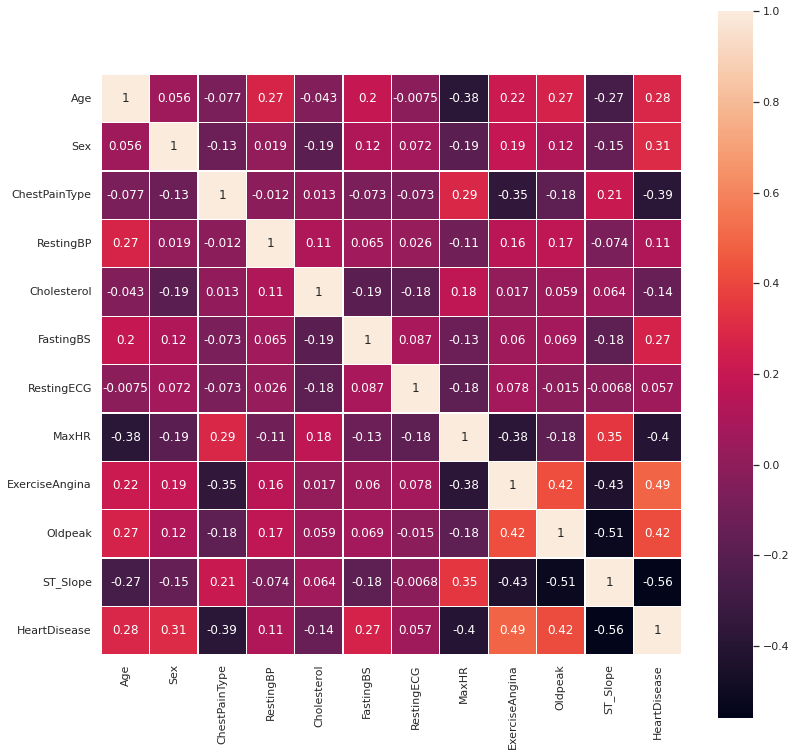

In [ ]:
sns.set(rc = {'figure.figsize': (13, 13)})
sns.heatmap(heart.corr(), square = True, annot=True, linewidth=.3)

**Separamos los datos entre entrenamiento y prueba, como se pide un 25% para el test, se usa el parámetro test_size**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_heart, y_heart, random_state=1, test_size=0.25)

**Elegimos, instanciamos y entrenamos el modelo**

In [ ]:
k = 15
w = 'uniform'

model = KNeighborsClassifier(k, weights=w)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

**La precisión de este modelo es de un 73,47%**

In [ ]:
accuracy_score(y_test, y_predict) * 100

73.47826086956522

**Obtenemos un array con las predicciones hechas por nuestro modelo**

In [ ]:
y_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

Predicción

In [ ]:
prediccion = pd.DataFrame({'Age':[48], 'Sex':[0], 'ChestPainType':[0], 'RestingBP':[41], 'Cholesterol':[40], 'FastingBS':[1], 'RestingECG':[2],
        'MaxHR':[100], 'ExerciseAngina':[1], 'Oldpeak':[30], 'ST_Slope':[2]})

In [ ]:
model.predict(prediccion)[0]

0

**Generamos una matriz de confusión a partir de la predicción de nuestro modelo**

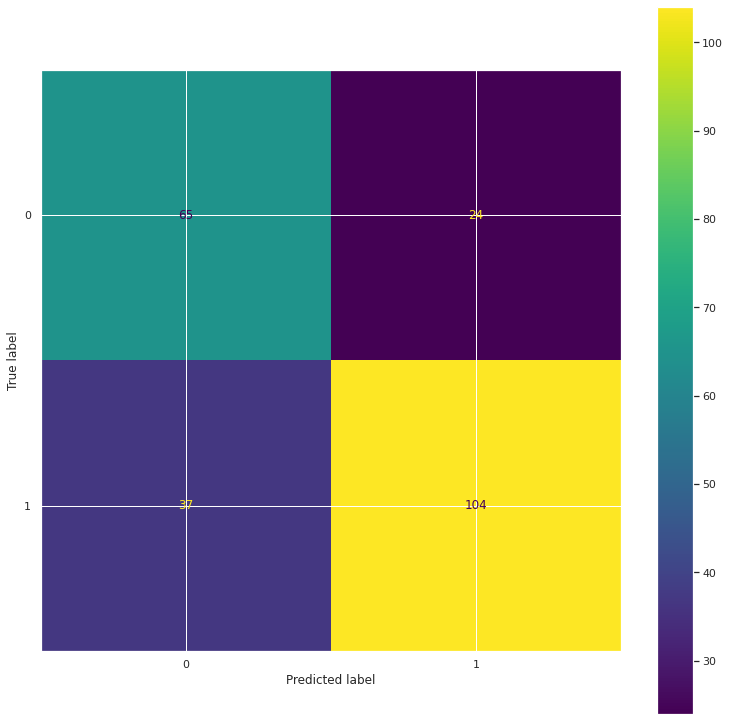

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

Error cuadrático medio

In [ ]:
mean_squared_error(y_test, y_predict)

0.26521739130434785

Error absoluto medio

In [ ]:
mean_absolute_error(y_test, y_predict)

0.26521739130434785

# 3.
https://www.kaggle.com/mssmartypants/paris-housing-price-prediction. Predicción de precios de las casas de París. El dataset contiene una serie de datos de casas, como por ejemplo número de habitaciones, año de construcción, piscina, garaje, etc. y el precio por el que se han vendido. El objetivo es, dada una serie de parámetros, predecir el precio que debe tener la casa.

In [ ]:
prices = pd.read_csv('ParisHousing.csv')
prices

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


**Enseñamos las 5 primeras y últimas filas del dataset**

In [ ]:
prices.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
prices.tail(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4


**Transformamos los valores en numérico y separamos los datos de entrada y etiquetas (resultados)**

In [ ]:
prices = prices.apply(lambda col: pd.factorize(col, sort=True)[0])

x_prices = prices.drop('price', axis=1)
y_prices = prices['price']

**Mostramos los parámetros estadísticos del dataset**

In [ ]:
prices.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000
mean,4734.590500,49.358400,0.508700,0.496800,49.276300,4755.535000,4.510100,4.521700,15.48850,0.499100,0.499900,3200.923100,3137.039800,453.12120,0.503000,4.99460,4999.50000
std,2736.999876,28.816696,0.499949,0.500015,28.889171,2740.998096,2.872024,2.856667,9.30809,0.500024,0.500025,1826.923136,1812.168352,262.05017,0.500016,3.17641,2886.89568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
25%,2362.750000,24.000000,0.000000,0.000000,24.000000,2383.750000,2.000000,2.000000,7.00000,0.000000,0.000000,1624.750000,1562.000000,227.75000,0.000000,2.00000,2499.75000
50%,4735.500000,49.000000,1.000000,0.000000,49.000000,4760.000000,4.000000,4.000000,15.50000,0.000000,0.000000,3230.500000,3147.500000,454.00000,1.000000,5.00000,4999.50000
75%,7102.250000,74.000000,1.000000,1.000000,75.000000,7121.250000,7.000000,7.000000,24.00000,1.000000,1.000000,4775.250000,4704.250000,677.25000,1.000000,8.00000,7499.25000
max,9482.000000,99.000000,1.000000,1.000000,99.000000,9508.000000,9.000000,9.000000,31.00000,1.000000,1.000000,6351.000000,6266.000000,900.00000,1.000000,10.00000,9999.00000


**Creamos el mapa de calor del dataset**

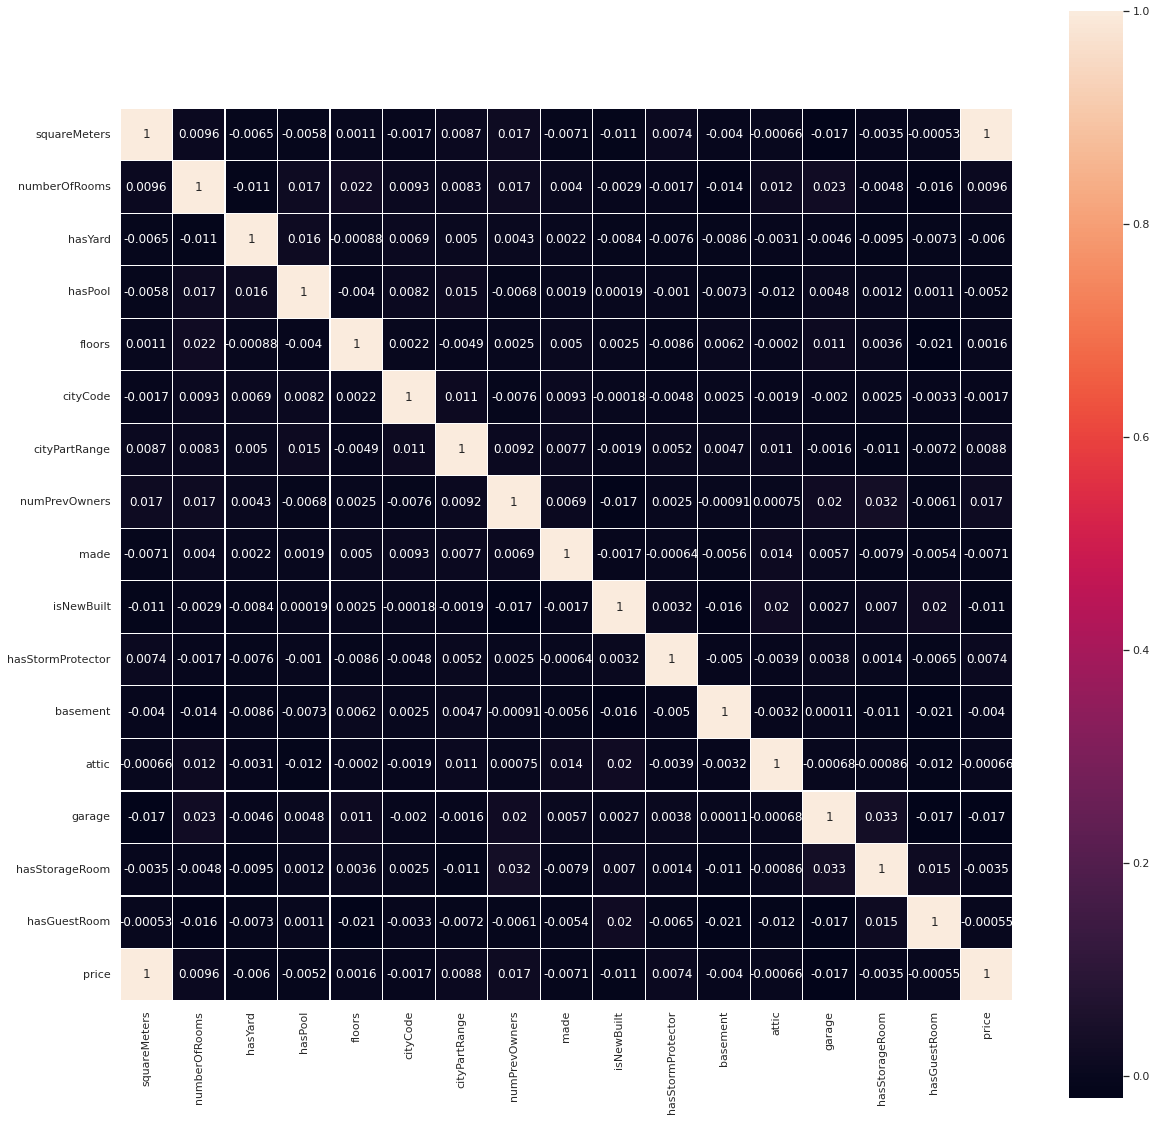

In [ ]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.heatmap(prices.corr(), square = True, annot=True, linewidth=.3)

**Separamos los datos entre entrenamiento y prueba, como se pide un 25% para el test, se usa el parámetro test_size**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_prices, y_prices, random_state=1, test_size=0.25)

**Elegimos, instanciamos y entrenamos el modelo**

In [ ]:
k = 15
w = 'uniform'

model = KNeighborsClassifier(k, weights=w)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [ ]:
y_predict

array([6862, 7237,  730, ..., 7078, 3396, 1046])

Realizar una prediccion

In [ ]:
prediccion = pd.DataFrame({'squareMeters':[7178], 'numberOfRooms':[2], 'hasYard':[0], 'hasPool':[1], 'floors':[62],
        'cityCode':[917], 'cityPartRange':[7], 'numPrevOwners':[2], 'made':[19], 'isNewBuilt':[1], 'hasStormProtector':[1], 
        'basement':[1860], 'attic':[1505], 'garage':[130], 'hasStorageRoom':[0], 'hasGuestRoom':[1]})

In [ ]:
model.predict(prediccion)[0]

6787

Error cuadrático medio

In [ ]:
mean_squared_error(y_test, y_predict)

740144.43

Error absoluto medio

In [ ]:
mean_absolute_error(y_test, y_predict)

822.8116

Representar gráficamente los valores predichos con los valores reales

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


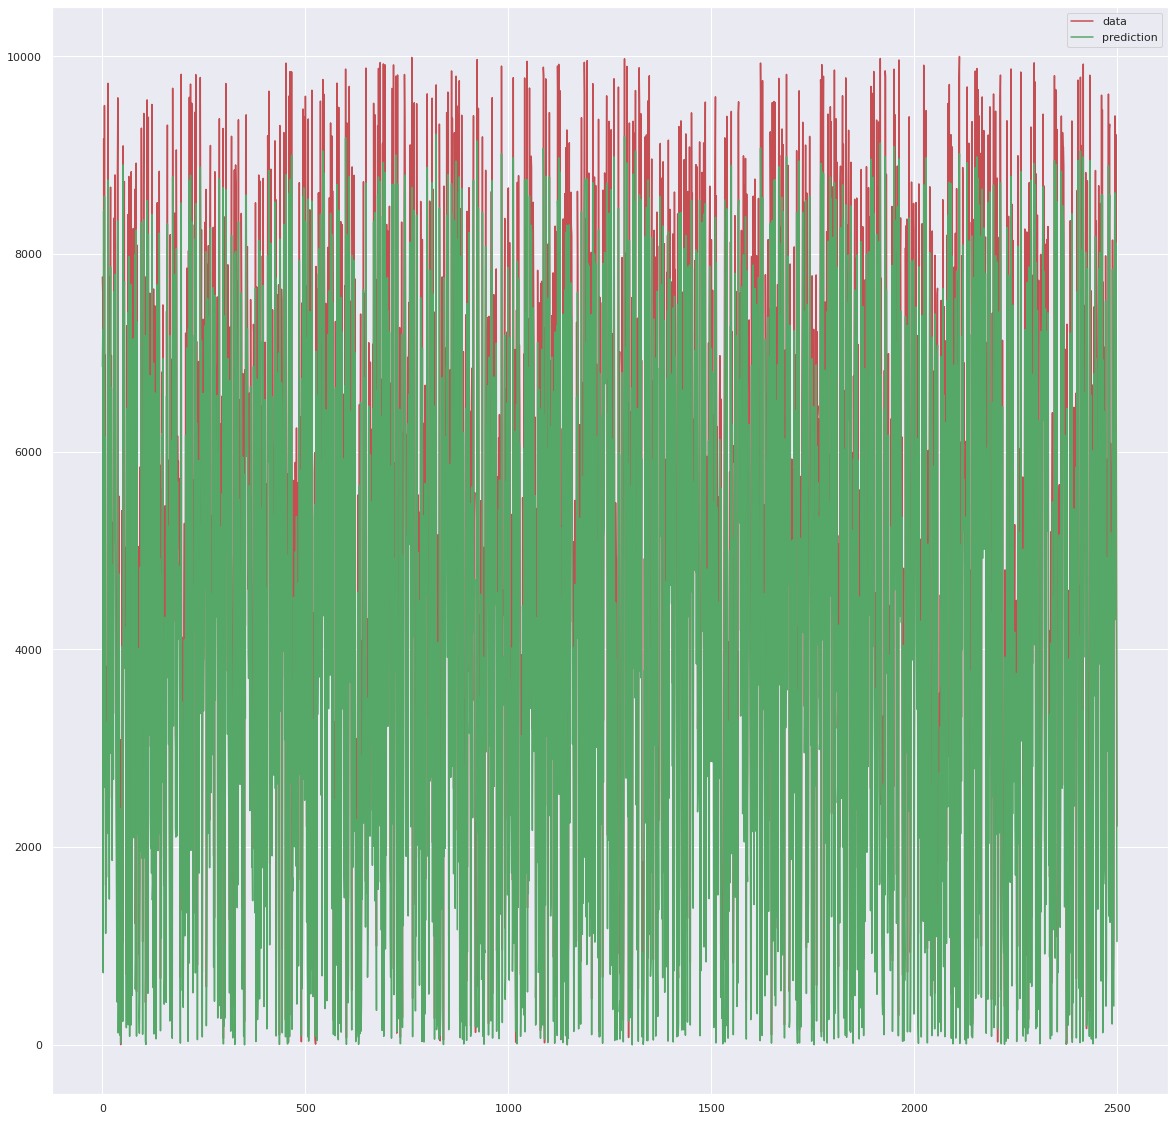

In [ ]:
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx,y_test, c = 'r', label = 'data')
plt.plot(xx,y_predict, c = 'g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

Optimizar hiperparámetros

In [ ]:
# x_prices = prices.drop('price', axis=1)
# y_prices = prices['price']

w = 'uniform'
results = []
small_results = []
for k in range(1, 30):
  model = KNeighborsClassifier(k, weights=w)
  n_splits = 5
  kf = KFold(n_splits)
  for train_fold, test_fold in kf.split(prices):
    paris_x_train = x_prices.iloc[train_fold]
    paris_y_train = y_prices.iloc[train_fold]

    model = KNeighborsClassifier(k, weights=w)
    model.fit(paris_x_train, paris_y_train)
    y_predict = model.predict(x_test)
    small_results.append(y_predict)
  results.append(mean(small_results))